# Week 14 Homework

#### 1.	Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import ols

In [2]:
pd.set_option('max_columns', 74)
pd.set_option('max_rows', 74)

In [3]:
#creating dataframe and looking at it

bottle = pd.read_csv("../week_13/bottle.csv", low_memory = False)
bottle.head(5)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### First pass: dropping uninformative columns (ID labels, object dtypes)

In [4]:
# Checking basics: 
# column list:
bottle.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [5]:
# check for variable type:
bottle.dtypes

Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm                   int64
T_degC                 float64
Salnty                 float64
O2ml_L                 float64
STheta                 float64
O2Sat                  float64
Oxy_µmol/Kg            float64
BtlNum                 float64
RecInd                   int64
T_prec                 float64
T_qual                 float64
S_prec                 float64
S_qual                 float64
P_qual                 float64
O_qual                 float64
SThtaq                 float64
O2Satq                 float64
ChlorA                 float64
Chlqua                 float64
Phaeop                 float64
Phaqua                 float64
PO4uM                  float64
PO4q                   float64
SiO3uM                 float64
SiO3qu                 float64
NO2uM                  float64
NO2q                   float64
NO3uM                  float64
NO3q    

In [6]:
# Droping object columns as they are out of scope:
bottle.drop(['Sta_ID','Depth_ID', 'IncTim', 'DIC Quality Comment' ],axis=1,inplace=True)

In [7]:
# check for / count nulls
bottle.isnull().sum()

Cst_Cnt             0
Btl_Cnt             0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
BtlNum         746196
RecInd              0
T_prec          10963
T_qual         841736
S_prec          47354
S_qual         789949
P_qual         191108
O_qual         680187
SThtaq         799040
O2Satq         647066
ChlorA         639591
Chlqua         225697
Phaeop         639592
Phaqua         225693
PO4uM          451546
PO4q           413077
SiO3uM         510772
SiO3qu         353997
NO2uM          527287
NO2q           335389
NO3uM          527460
NO3q           334930
NH3uM          799901
NH3q            56564
C14As1         850431
C14A1p         852103
C14A1q          16258
C14As2         850449
C14A2p         852121
C14A2q          16240
DarkAs         842214
DarkAp         844406
DarkAq          24423
MeanAs         842213
MeanAp         844406
MeanAq          24424
LightP    

In [8]:
# drop columns with nulls > 70%

# creating a function for this

delete_col=[]
for i in range(len(bottle.columns)):
    percent_num = ((bottle.iloc[:,i].isnull().sum())/len(bottle))*100
    if percent_num >= 30:
            delete_col.append(bottle.columns[i])
            
print('Columns deleted from original dataset', delete_col)

bottle.drop(delete_col, axis = 1, inplace = True)

Columns deleted from original daataset ['BtlNum', 'T_qual', 'S_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Phaeop', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'C14As1', 'C14A1p', 'C14As2', 'C14A2p', 'DarkAs', 'DarkAp', 'MeanAs', 'MeanAp', 'LightP', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1']


In [9]:
bottle.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual',
       'Chlqua', 'Phaqua', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq',
       'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA',
       'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_PRES'],
      dtype='object')

#### 2.	Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

Ultimately, feature selection should be guided by the context of the analysis. We should have some a priori sense of the kinds of questions we can ask of the data, or of the possible relationships between explanatory and response variables. 

For this homework assignment, the motivation for the multiple regression is not explicitly stated. In the last homework, we considered the relationship between salinity (feature) and water temperature (response variable). For this exercise I assume that we broaden the scope of features that might possibly exert an influence on water temperature. 

The first step is to create a correlation matrix with the response variable, water temperature. Then, based on some threshold, weakly correlated features will be dropped. 

In [10]:
# Finding the correlation matrix for output variable "T_degC" with all other variables of the colunm:

bottle.corr()['T_degC']

Cst_Cnt        0.089329
Btl_Cnt        0.090118
Depthm        -0.681201
T_degC         1.000000
Salnty        -0.505266
O2ml_L         0.795700
STheta        -0.829155
O2Sat          0.850596
Oxy_µmol/Kg    0.795543
RecInd        -0.066507
T_prec        -0.041076
S_prec        -0.036218
P_qual        -0.000631
Chlqua        -0.006510
Phaqua        -0.006761
NH3q           0.001007
C14A1q        -0.004169
C14A2q        -0.004169
DarkAq        -0.004066
MeanAq        -0.004214
R_Depth       -0.681200
R_TEMP         1.000000
R_POTEMP       0.999954
R_SALINITY    -0.503959
R_SIGMA       -0.862161
R_SVA          0.964171
R_DYNHT       -0.799025
R_O2           0.795700
R_O2Sat        0.850365
R_PRES        -0.679852
Name: T_degC, dtype: float64

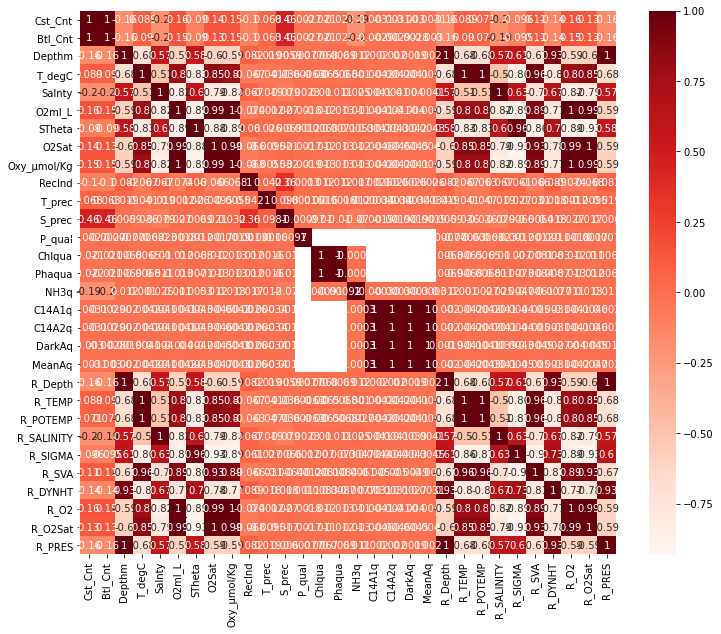

In [11]:
# Visualizing...

plt.figure(figsize=(12,10))
cor = bottle.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
# Correlation with response variable, T_degC

cor_response = abs(cor['T_degC'])

# Selecting highly correlated features (correlations exceed |0.5|)

relevant_features = cor_response[cor_response>0.5]
relevant_features

Depthm         0.681201
T_degC         1.000000
Salnty         0.505266
O2ml_L         0.795700
STheta         0.829155
O2Sat          0.850596
Oxy_µmol/Kg    0.795543
R_Depth        0.681200
R_TEMP         1.000000
R_POTEMP       0.999954
R_SALINITY     0.503959
R_SIGMA        0.862161
R_SVA          0.964171
R_DYNHT        0.799025
R_O2           0.795700
R_O2Sat        0.850365
R_PRES         0.679852
Name: T_degC, dtype: float64

In [14]:
# Drop columns not in this set

bottle.drop(columns=[col for col in bottle if col not in relevant_features], inplace=True)
bottle.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,0,10.50,33.440,NaN,25.649,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,0
1,8,10.46,33.440,NaN,25.656,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,8
2,10,10.46,33.437,NaN,25.654,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,10
3,19,10.45,33.420,NaN,25.643,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,19
4,20,10.45,33.421,NaN,25.643,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,20


One of the required assumptions for linear regression is that of independence among explanatory variables.  We have to examine the correlation matrix of the current feature set identify any correlations among features. Highly correlated features will be culled to eliminate redundancy. This helps avoid the problem of multicollinearity. 

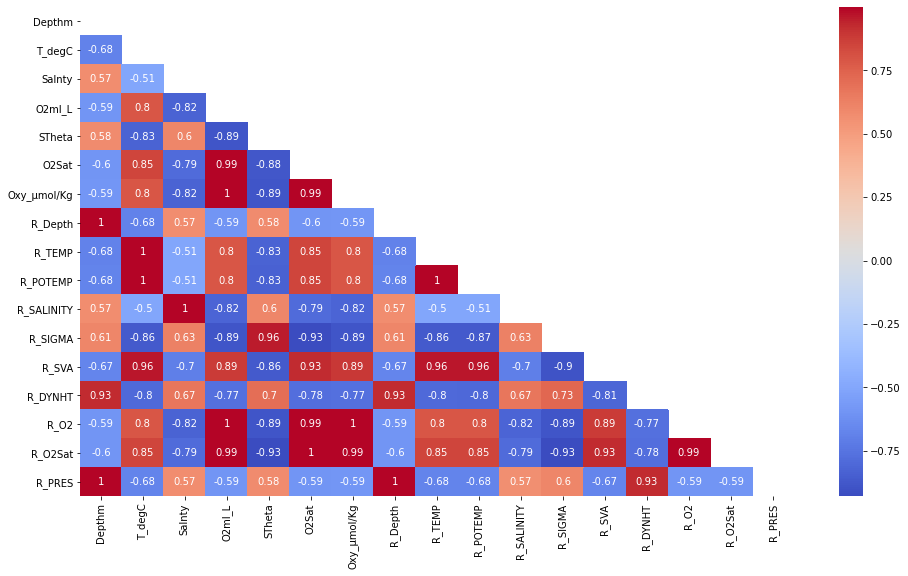

In [15]:
# Examining 'independence' among features by looking at their correlations:

plt.figure(figsize=(16,9))
 
corr_mx = bottle.corr() # correlation matrix
 
matrix = np.triu(corr_mx) # take upper correlation matrix
 
sns.heatmap(corr_mx, mask=matrix, annot=True, cmap="coolwarm");

Here, I consider "high" correlations to be anything > |0.6|. Based on my visual inspection of clusters of similar kinds of variables:

Temp_degC is correlated with R_TEMP and R_POTEMP. Retaining Temp_degC.

Depth is highly correlated with R_DYNHT, R_SVA, R_SIGMA, R_POTEMP, R_TEMP, R_DEPTH. Dropping R_Depth, R_SVA

The oxygen variables O2ml_L, O2Sat, Oxy_µmol/Kg, R_O2, R_O2Sat are highly correlated. Retaining O2ml_L, dropping rest.

Salinity is highly correlated with R_O2Sat, R_O2, R_SVA, R_SALINITY, Oxy_µmol/Kg, O2Sat, and O2ml_L. Retaining Salinity, dropping R_SALINITY (most other correlates have been dropped). 

SThetha and R_Sigma are highly correlated. Because R_SIGMA has fewer high correlations thaan STheta, retaining, R_SIGMA. 

In [16]:
bottle.drop(['O2Sat','Oxy_µmol/Kg', 'R_O2Sat', 'R_O2','R_TEMP', 'R_POTEMP', 'R_Depth', 'R_SVA', 
            'R_SALINITY','STheta',],axis=1,inplace=True)

In [17]:
#columns retained after analysis:
bottle.columns

Index(['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'R_SIGMA', 'R_DYNHT', 'R_PRES'], dtype='object')

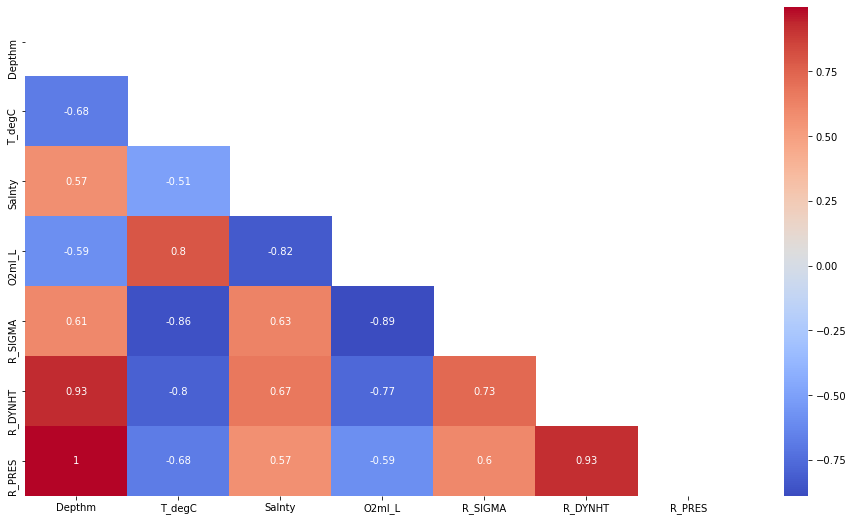

In [18]:
# Checking resulting correlations:


plt.figure(figsize=(16,9))
 
corr_mx_final = bottle.corr() # correlation matrix
 
matrix_final = np.triu(corr_mx_final) # take upper correlation matrix
 
sns.heatmap(corr_mx_final, mask=matrix_final, annot=True, cmap="coolwarm");

### Impute the NaNs with appropriate values:

In [19]:
# Checking remaining nulls

bottle.isnull().sum()

Depthm          0
T_degC      10963
Salnty      47354
O2ml_L     168662
R_SIGMA     52856
R_DYNHT     46657
R_PRES          0
dtype: int64

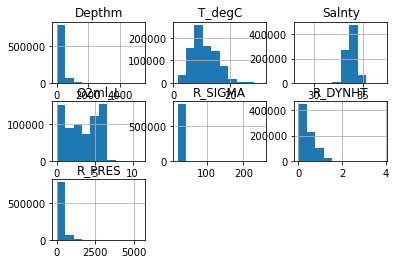

In [26]:
# Looking at histograms of features to determine if imputation with mean is suitable.

bottle.hist(['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'R_SIGMA', 'R_DYNHT','R_PRES']);

In [27]:
bottle.describe()

,Depthm,T_degC,Salnty,O2ml_L,R_SIGMA,R_DYNHT,R_PRES
count,864863.000000,853900.000000,817509.000000,696201.000000,812007.000000,818206.000000,864863.000000
mean,226.831951,10.799677,33.840350,3.392468,25.811010,0.431763,228.395694
std,316.050259,4.243825,0.461843,2.073256,1.124645,0.382336,319.456731
min,0.000000,1.440000,28.431000,-0.010000,20.934000,0.000000,0.000000
25%,46.000000,7.680000,33.488000,1.360000,24.960000,0.130000,46.000000
50%,125.000000,10.060000,33.863000,3.440000,25.990000,0.340000,126.000000
75%,300.000000,13.880000,34.196900,5.500000,26.640000,0.640000,302.000000
max,5351.000000,31.140000,37.034000,11.130000,250.784000,3.880000,5458.000000


In [29]:
# Here, I am going to try the mean and check the stats again

colm_list=['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'R_SIGMA', 'R_DYNHT','R_PRES']

for i in colm_list:
    bottle[i]=bottle[i].fillna(bottle[i].mean())

In [30]:
bottle.describe()

,Depthm,T_degC,Salnty,O2ml_L,R_SIGMA,R_DYNHT,R_PRES
count,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000
mean,226.831951,10.799677,33.840350,3.392468,25.811010,0.431763,228.395694
std,316.050259,4.216841,0.449022,1.860144,1.089737,0.371880,319.456731
min,0.000000,1.440000,28.431000,-0.010000,20.934000,0.000000,0.000000
25%,46.000000,7.720000,33.504000,1.890000,25.014000,0.150000,46.000000
50%,125.000000,10.130000,33.840350,3.392468,25.860000,0.370000,126.000000
75%,300.000000,13.830000,34.180000,5.240000,26.610000,0.610000,302.000000
max,5351.000000,31.140000,37.034000,11.130000,250.784000,3.880000,5458.000000


Means didn't change much (expected); standard deviations were reduced for T_degC, Salnty and O2ml_L. I'm okay with this for now. Based on the histograms, the only features I WOULDN'T transform are T_degC, Salnty and O2ml_L. 

### RFE:

Now, I'll use RFE to select features.

In [31]:
X=bottle.drop('T_degC',axis=1)
y=bottle['T_degC']

In [37]:
model=LinearRegression()
rfe=RFE(model, n_features_to_select=7)   # 10 variables are chosen randomly.
X_rfe=rfe.fit_transform(X,y)
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
print("Model accuracy",rfe.score(X,y))

[ True  True  True  True  True  True]
[1 1 1 1 1 1]
Model accuracy 0.8348337444948993


In [36]:
cols = list(X.columns)

temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Depthm', 'Salnty', 'O2ml_L', 'R_SIGMA', 'R_DYNHT', 'R_PRES'], dtype='object')


The results of RFE indicate all features are important. We get at max of 83% of information from the data. I'll continue with this set of features. I am partial to starting with a minimum set of features and then increasing complexity by adding features. 

#### 3.	Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 

In [38]:
# Regular Linear Regression:

X= np.array(bottle['Salnty']).reshape(-1,1)
y= np.array(bottle['T_degC']).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

bot_reg=LinearRegression()
bot_reg.fit(X_train,y_train)

y_pred=bot_reg.predict(X_test)

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(y_test,y_pred)

print("r2 score:",score)
print("mean_sqrd_error :",mean_squared_error(y_test,y_pred))
print("root_mean_squared error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.23889976582015215
mean_sqrd_error : 13.50832345579292
root_mean_squared error 3.675367118505704


In [40]:
# Multiple Regression:

X1= bottle[['Depthm', 'Salnty', 'O2ml_L', 'R_SIGMA', 'R_DYNHT', 'R_PRES']]
y1= bottle['T_degC']
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.25,random_state=1)

mul_reg=LinearRegression()
mul_reg.fit(X1_train,y1_train)

y1_pred=mul_reg.predict(X1_test)

In [41]:
score1=r2_score(y1_test,y1_pred)

print("r2 score:",score1)
print("mean_sqrd_error :",mean_squared_error(y1_test,y1_pred))
print("root_mean_squared error",np.sqrt(mean_squared_error(y1_test,y1_pred)))

r2 score: 0.7391058432588977
mean_sqrd_error : 4.630457985317565
root_mean_squared error 2.1518498984170726


In [42]:
X_train=pd.DataFrame(X_train)

In [43]:
X_train=X_train.rename(columns={'0':'Salnty'})

In [45]:
#Intercept:

print("Intercept of Linear Model:" ,bot_reg.intercept_ )

print("Intercept of Multiple Regression Model:" ,mul_reg.intercept_)

Intercept of Linear Model: [166.82321306]
Intercept of Multiple Regression Model: -33.86056017970263


In [46]:
# Coefficient for models:

print("The coefficient for Linear Model:", bot_reg.coef_)

#for idx, col_name in enumerate(X1.columns):
print("The coefficient for Multiple Regression Model:",mul_reg.coef_)

The coefficient for Linear Model: [[-4.6105375]]
The coefficient for Multiple Regression Model: [-0.51344935  3.28363576  0.55611783 -2.58703421 -0.25029306  0.50352546]


In [47]:
X1.columns

Index(['Depthm', 'Salnty', 'O2ml_L', 'R_SIGMA', 'R_DYNHT', 'R_PRES'], dtype='object')

Resulting equation for Linear Regression:
y= 166.8232 + (-4.6105)Salnty

Resulting equation for Multiple Linear Regression:
y= -33.8606 + (-0.5134)Depthm + (3.2836)Salnty + (0.5561)O2ml_L + (-2.5870)R_SIGMA + (-0.2503)R_DYNHT+ (0.5035)R_PRES

#### 4.	Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

Major differences: 

The one feature that the two regression approaches share in common is Salnty. For the linear regression, the coefficient is -4.6105. For the multiple regression, the coefficient of Salnty is 3.2836.

Regarding model performance, the linear regression model has an r2 value of 0.239 and a MSE of 13.508.
In comparison, the multiple regression model had a much higher r2 value (0.739) and an appreciably lower MSE (4.630). In conclusion, the multiple regression model performed much better. 

However, given the relatively low r2 value, model performance may be improved by including some of the features that were omitted. 

#### 5.	Work with the diabetes dataset to perform multiple logistic regression. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that. 

In [48]:
#creating the dataframe

diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
diabetes_df.shape

(768, 9)

In [50]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
# Defining the feature matrix and the target.

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [53]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 14, stratify = y)

In [54]:
# Standardizing

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [55]:
#Simplest logistic regression approach
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
#sample_pred=[[6,148,72,35,0,33.6,0.627,50]]
y_predicted = clf.predict(X_test)

In [56]:
clf.score(X_test,y_test)

0.7552083333333334

In [57]:
# except for Pregnancies and Outcome, replacing uninformative zeroes with feature means. 
# ignoring gender column, as that information is not known. 

col=diabetes_df.iloc[:,1:-1].columns
for i in col:
    diabetes_df[i]=diabetes_df[i].replace(0,round(diabetes_df[i].mean()))

### Logistic Regression

In [60]:
X5=np.array(diabetes_df['BMI']).reshape(-1,1)
y5=np.array(diabetes_df['Outcome']).reshape(-1,1).ravel()
X5_train,X5_test,y5_train,y5_test=train_test_split(X5,y5,test_size=0.25)

In [62]:
diabetes_log_bmi= LogisticRegression(solver='liblinear')
diabetes_log_bmi.fit(X5_train,y5_train)

y_pred_bmi= diabetes_log_bmi.predict(X5_test)

print(diabetes_log_bmi.score(X5_test,y5_test))
print(diabetes_log_bmi.score(X5,y5))

0.65625
0.66015625


In [63]:
print(diabetes_log_bmi.coef_)

[[0.08836904]]


In [64]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

con_log_one=confusion_matrix(y5_test, y_pred_bmi)
con_log_one

array([[112,  21],
       [ 45,  14]])

# Multiple Logistic Regression

In [65]:
X=diabetes_df.iloc[:,0:-1]
y=diabetes_df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y)

In [66]:
diabetes_log= LogisticRegression(solver='liblinear')
diabetes_log.fit(X_train,y_train)

y_pred= diabetes_log.predict(X_test)

print(diabetes_log.score(X_test,y_test))
print(diabetes_log.score(X,y))

0.7604166666666666
0.7682291666666666


In [67]:
diabetes_log.coef_

array([[ 0.14365059,  0.03071528, -0.02771578,  0.00095506, -0.00074868,
         0.06108665,  0.50340738,  0.00424045]])

In [68]:
con_log=confusion_matrix(y_test, y_pred)
con_log

array([[115,  10],
       [ 36,  31]])

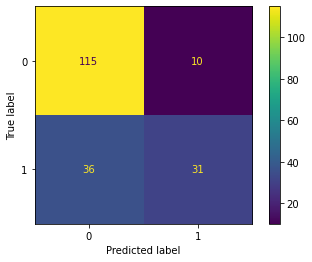

In [69]:
plot_confusion_matrix(diabetes_log, X_test, y_test)

In [70]:
# An alternative approach to the Multiple Logistic Regression: 

dia_mul=LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(X_train,y_train)

y_pred_mul=dia_mul.predict(X_train)

print(dia_mul.score(X_test,y_test))
print(dia_mul.score(X,y))

0.7708333333333334
0.7734375


#### 6.	What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

#### Logistic performance:

In [71]:
TNl = con_log_one[0,0]
TPl = con_log_one[1,1]
FNl = con_log_one[1,0]
FPl = con_log_one[0,1]

Accuracy_logl= (TNl + TPl) / (TNl + TPl + FNl + FPl)
print("Accuracy for  Logistic:",Accuracy_logl)

Accuracy for  Logistic: 0.65625


In [72]:
sens_logl = TPl / (FNl + TPl)

print("Sensitivity for Logistic:", sens_logl)

Sensitivity for Logistic: 0.23728813559322035


In [81]:
spec_logl = TNl / (TNl + FPl)

print("Specificity for Logistic:", spec_logl)

Specificity for Logistic: 0.8421052631578947


#### Multi Logistic performance:


In [78]:
TN = con_log[0,0]
TP = con_log[1,1]
FN = con_log[1,0]
FP = con_log[0,1]

Accuracy_log= (TN + TP) / (TN + TP + FN + FP)
print("Accuracy for Multivariate Logistic:",Accuracy_log)

Accuracy for Multivariate Logistic: 0.7604166666666666


In [79]:
sens_log = TP / (FN + TP)

print("Sensitivity for Multivariate Logistic:", sens_log)

Sensitivity for Multivariate Logistic: 0.4626865671641791


In [82]:
spec_log = TN / (TN + FP)

print("Specificity for for Multivariate Logistic:", spec_log)

Specificity for for Multivariate Logistic: 0.92


Compared to the univariate logistic model, the multivariate logistic model has better accuracy (0.760 vs. 0.656), sensitivity (0.463 vs. 0.237), and specificity (0.920 vs.0.842). Based on the improvement of these metrics, the multivariate logistic model is the better approach. It does a better job of correctly identifying true positives. (However, both approaches are rather weak in terms of sensitivity.) In conclusion, the outcome is not the consequence of a single explanatory variable. 

#### 7.	Is the kNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 

In [89]:
X3=diabetes_df.iloc[:,0:-1]
y3=diabetes_df.iloc[:,-1]

X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.3,stratify=y)


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X3_train,y3_train)
y3_predicted = knn.predict(X3_test)
print(y3_predicted)

[1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0]


In [90]:
print(knn.score(X3_test, y3_test))

0.7402597402597403


In [91]:
print(knn.score(X3,y3))

0.7708333333333334


In [92]:
con_knn= confusion_matrix(y3_test, y3_predicted)
con_knn

array([[133,  17],
       [ 43,  38]])

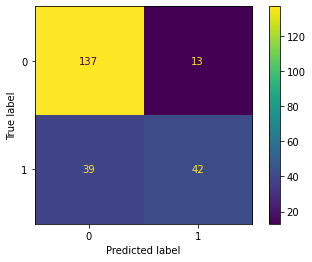

In [87]:
plot_confusion_matrix(diabetes_log, X3_test, y3_test);

In [93]:
TN1 = con_knn[0,0]
TP1 = con_knn[1,1]
FN1 = con_knn[1,0]
FP1 = con_knn[0,1]

Accuracy_knn= (TN1 + TP1) / (TN1 + TP1 + FN1 + FP1)
print("Accuracy for kNN:", Accuracy_knn)

sens_knn = TP1 / (FN1 + TP1)
print("Sensitivity for kNN:", sens_knn)

spec_knn = TN1 / (TN1 + FP1)
print("Specificity for kNN:", spec_knn)

Accuracy for kNN: 0.7402597402597403
Sensitivity for kNN: 0.4691358024691358
Specificity for kNN: 0.8866666666666667


Comparing the multivariate logistic model and kNN:

The accuracy for multivariate logistic model: 0.760; for kNN: 0.740. The Multivariate model is better at correctly predicting the outcome.

The sensitivity, or proportion of true positives, is 0.463 for the multivariate model; for kNN: 0.469. kNN is slightly better. 

The specificity, or proportion of true negatives, is 0.920 for the multivariate model; for kNN: 0.887. Here, multivariate model outperforms. 

Based on these three metrics, it's better to use the multiple logistic regression to predict outcomes. The accuracy is higher, and there are fewer false negatives. Nobody wants a false negative.

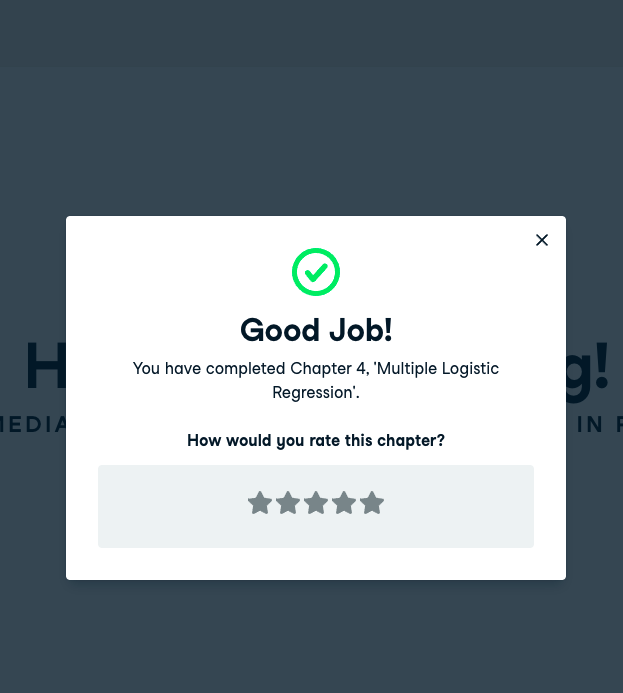